# Data Description

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

![data structure](img/home_credit.png)

**1. application_{train|test}.csv**

>This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**2. bureau.csv**

>All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**3. bureau_balance.csv**

>Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**4. POS_CASH_balance.csv**

>Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**5. credit_card_balance.csv**

>Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample \* # of relative previous credit cards \* # of months where we have some history observable for the previous credit card) rows.


**6. previous_application.csv**

>All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

**7. installments_payments.csv**

>Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


**8. HomeCredit_columns_description.csv**

>This file contains descriptions for the columns in the various data files.

# Part 2 Modeling with more sources of data

You can download the [data](https://www.kaggle.com/c/home-credit-default-risk) from Kaggle.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline
plt.style.use('ggplot')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') 

In [3]:
import functions as F

In [4]:
pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

Helper function ```col_name(name, df_description)```--> gives description of the column name defined in the table HomeCredit_columns_description.csv

In [ ]:
F.col_name('MONTHS_BALANCE')

#  Application Table - main table

Static data for all applications. One row represents one loan in our data sample.

In [5]:
application_train = pd.read_csv('data/application_train.csv.zip') 
application_test = pd.read_csv('data/application_test.csv.zip') 

In [6]:
df_train = application_train.copy()
df_test = application_test.copy()

In [7]:
df_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:
# basic feature engineering
df_train = F.application(df_train)
df_test = F.application(df_test)
df_train.to_csv('predictions/main_df_train.csv')
df_test.to_csv('predictions/main_df_test.csv')

In [11]:
# lgbm boosting classifier modeling only with main table and basic feature engineering
submission, fi, metrics = F.model(df_train, df_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762624	train's auc: 0.804165
Early stopping, best iteration is:
[245]	valid's auc: 0.763046	train's auc: 0.81149
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.766142	train's auc: 0.804168
[400]	valid's auc: 0.766395	train's auc: 0.83384
Early stopping, best iteration is:
[303]	valid's auc: 0.766539	train's auc: 0.820689
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770614	train's auc: 0.803899
Early stopping, best iteration is:
[291]	valid's auc: 0.771103	train's auc: 0.818977
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.76594	train's auc: 0.804703
Early stopping, best iteration is:
[222]	valid's auc: 0.766107	train's auc: 0.808406
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.764763	

In [12]:
submission.to_csv('submissions/my_lgbm_app.csv', index=False)

Kaggle score:
`0.76216
`

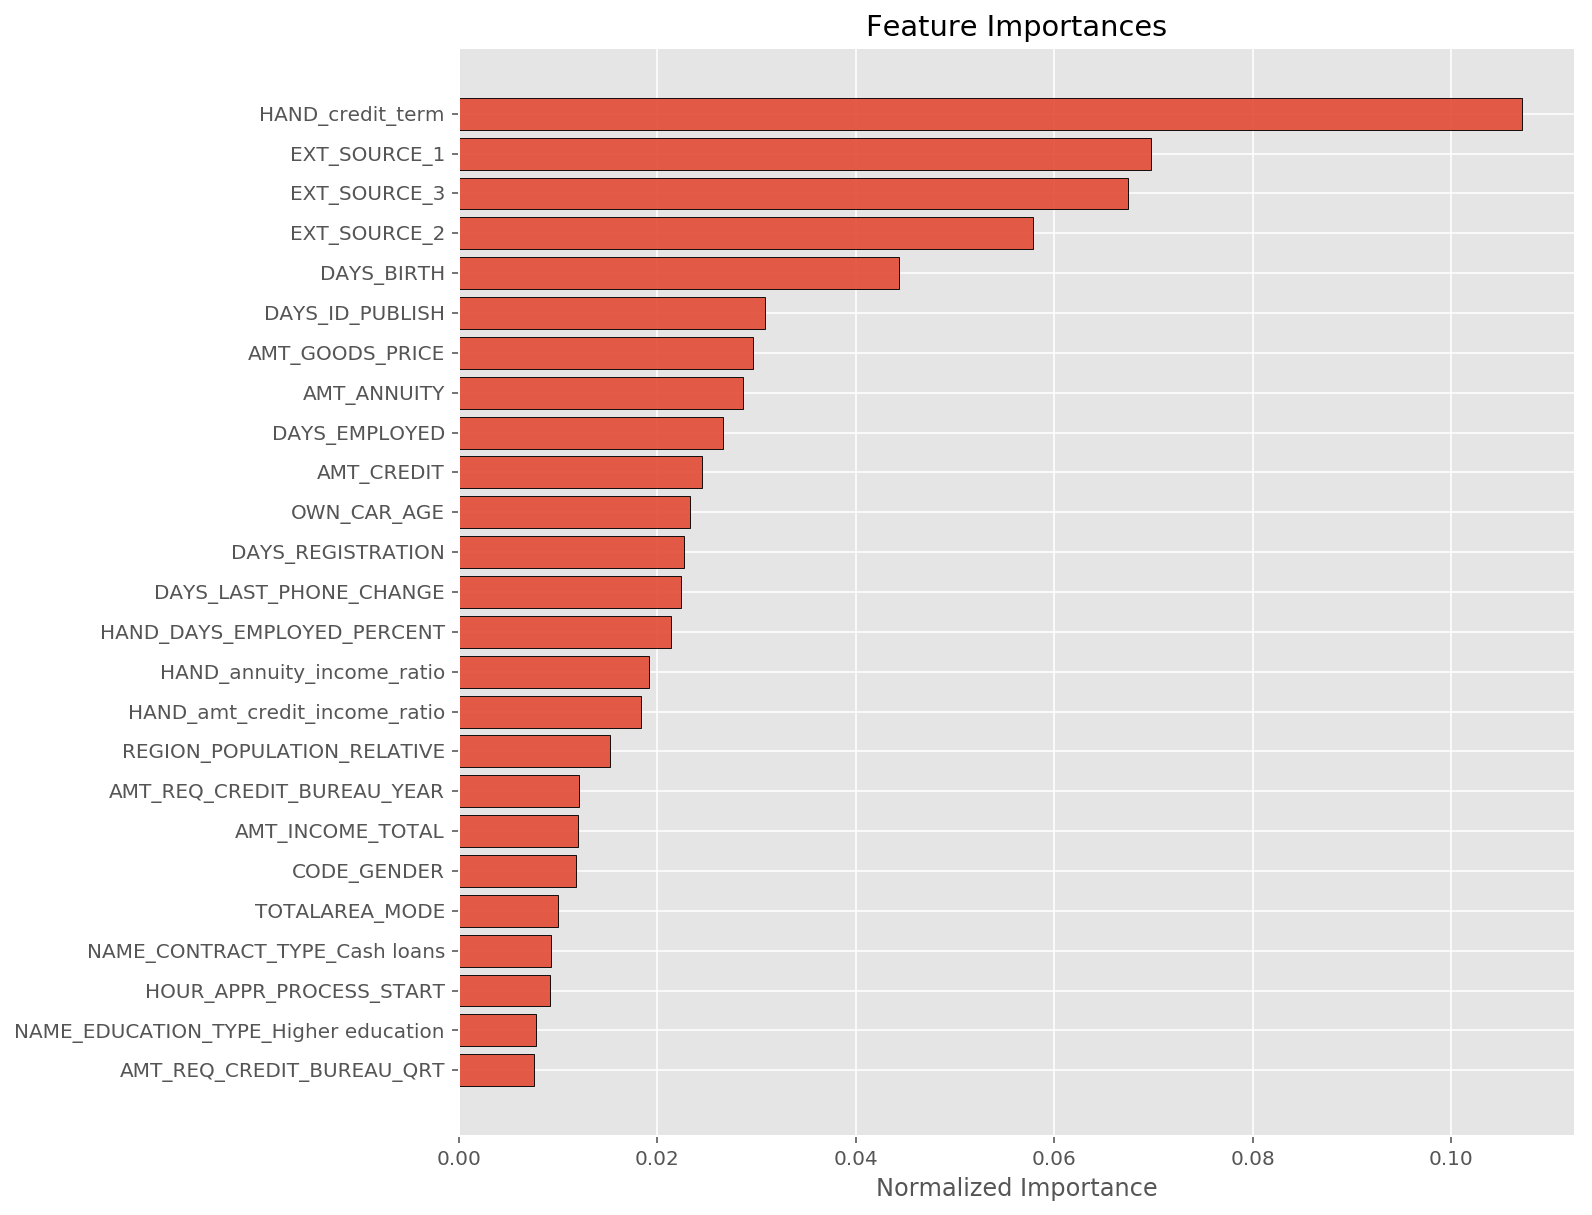

In [13]:
feat_import_series = F.plot_feature_importances(fi,n_show=25)

Our hand made feature credit term come surprisingly to the 1st place!

# Current Application - Bureau (level 1)
**bureau.csv:** All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

Parent: application | Child: bureau 

relationship: 1 to many (level1)

In [14]:
bureau = pd.read_csv('data/bureau.csv.zip')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [15]:
bureau.select_dtypes('object').apply(pd.Series.nunique)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [17]:
# Aggregates the numeric values in a dataframe. This can
# be used to create features for each instance of the grouping variable.
bureau_agg = F.agg_numeric(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head(2)

/Users/Alex/Documents/10_galvanize/galvanize/defaultrisk/functions.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  numeric_df[group_var] = group_ids


,bureau_DAYS_CREDIT_sum,bureau_DAYS_ENDDATE_FACT_sum,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_UPDATE_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CREDIT_DAY_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_sum,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_ANNUITY_min,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_DAYS_ENDDATE_FACT_count,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_DAYS_CREDIT_ENDDATE_count,bureau_AMT_ANNUITY_count,bureau_AMT_CREDIT_SUM_count,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_CREDIT_ENDDATE_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_sum,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_min,SK_ID_CURR,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max
0,-5145,-3302.0,-1572,-1329.0,-1328.0,-825.5,-735.0,-652,-544.0,-155,-93.142857,-49,-6,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.00000,0.000,0.000,0.000,4,6,7,7,7,7,7,82.428571,577.0,1778.0,3545.357143,10822.5,24817.5,85240.928571,85500.0,100001,207623.571429,373239.0,378000.0,596686.5,1453365.000,NaN,NaN,NaN
1,-6992,-4185.0,-1437,-1072.0,-1185.0,-697.5,-874.0,-3999,-36.0,-1185,-499.875000,-103,-7,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,5,7997.14125,8405.145,31988.565,31988.565,6,4,5,6,7,8,8,-349.000000,-2094.0,780.0,0.000000,0.0,0.0,49156.200000,0.0,100002,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645


In [18]:
# Merge with the training and testing data
df_train = df_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
df_test = df_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

In [19]:
#Computes counts and normalized counts for each observation
#of `group_var` of each unique category in every categorical variable
bureau_counts = F.count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head(2)

,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,bureau_CREDIT_ACTIVE_Bad debt_mean,bureau_CREDIT_ACTIVE_Bad debt_sum,bureau_CREDIT_TYPE_Interbank credit_mean,bureau_CREDIT_TYPE_Interbank credit_sum,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_CURRENCY_currency 4_mean,bureau_CREDIT_CURRENCY_currency 4_sum,bureau_CREDIT_CURRENCY_currency 3_mean,bureau_CREDIT_CURRENCY_currency 3_sum,bureau_CREDIT_TYPE_Loan for the purchase of equipment_mean,bureau_CREDIT_TYPE_Loan for the purchase of equipment_sum,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_mean,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_sum,bureau_CREDIT_TYPE_Unknown type of loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum,bureau_CREDIT_TYPE_Another type of loan_mean,bureau_CREDIT_TYPE_Another type of loan_sum,bureau_CREDIT_TYPE_Loan for working capital replenishment_mean,bureau_CREDIT_TYPE_Loan for working capital replenishment_sum,bureau_CREDIT_CURRENCY_currency 2_mean,bureau_CREDIT_CURRENCY_currency 2_sum,bureau_CREDIT_ACTIVE_Sold_mean,bureau_CREDIT_ACTIVE_Sold_sum,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Microloan_sum,bureau_CREDIT_TYPE_Car loan_mean,bureau_CREDIT_TYPE_Car loan_sum,bureau_CREDIT_TYPE_Loan for business development_mean,bureau_CREDIT_TYPE_Loan for business development_sum,bureau_CREDIT_TYPE_Credit card_mean,bureau_CREDIT_TYPE_Credit card_sum,bureau_CREDIT_ACTIVE_Active_mean,bureau_CREDIT_ACTIVE_Closed_mean,bureau_CREDIT_TYPE_Consumer credit_mean,bureau_CREDIT_CURRENCY_currency 1_mean,bureau_CREDIT_ACTIVE_Active_sum,bureau_CREDIT_ACTIVE_Closed_sum,bureau_CREDIT_TYPE_Consumer credit_sum,bureau_CREDIT_CURRENCY_currency 1_sum,bureau_CREDIT_ACTIVE_Active_count,SK_ID_CURR
0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.428571,0.571429,1.0,1.0,3,4,7,7,7,100001
1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.5,4,0.250000,0.750000,0.5,1.0,2,6,4,8,8,100002


In [20]:
# Merge with the training and testing data
df_train = df_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
df_test = df_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

In [21]:
df_train.to_csv('predictions/df_train_main_buro.csv')
df_test.to_csv('predictions/df_test_main_buro.csv')

In [22]:
submission, fi, metrics = F.model(df_train, df_test)


Training Data Shape:  (307511, 345)
Testing Data Shape:  (48744, 345)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.767711	train's auc: 0.813832
[400]	valid's auc: 0.767632	train's auc: 0.846474
Early stopping, best iteration is:
[341]	valid's auc: 0.768147	train's auc: 0.838007
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.771819	train's auc: 0.813676
Early stopping, best iteration is:
[247]	valid's auc: 0.771913	train's auc: 0.822277
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.775981	train's auc: 0.81262
[400]	valid's auc: 0.776689	train's auc: 0.845945
Early stopping, best iteration is:
[366]	valid's auc: 0.777051	train's auc: 0.840793
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.771705	train's auc: 0.813415
Early stopping, best iteration is:
[245]	valid's auc: 0.772121	train's auc: 0.821984
Training until validation scores don't 

NameError: name 'metrics1' is not defined

In [23]:
print(metrics)

      fold     train     valid
0        0  0.838007  0.768147
1        1  0.822277  0.771913
2        2  0.840793  0.777051
3        3  0.821984  0.772121
4        4  0.836078  0.770991
5  overall  0.831828  0.772025


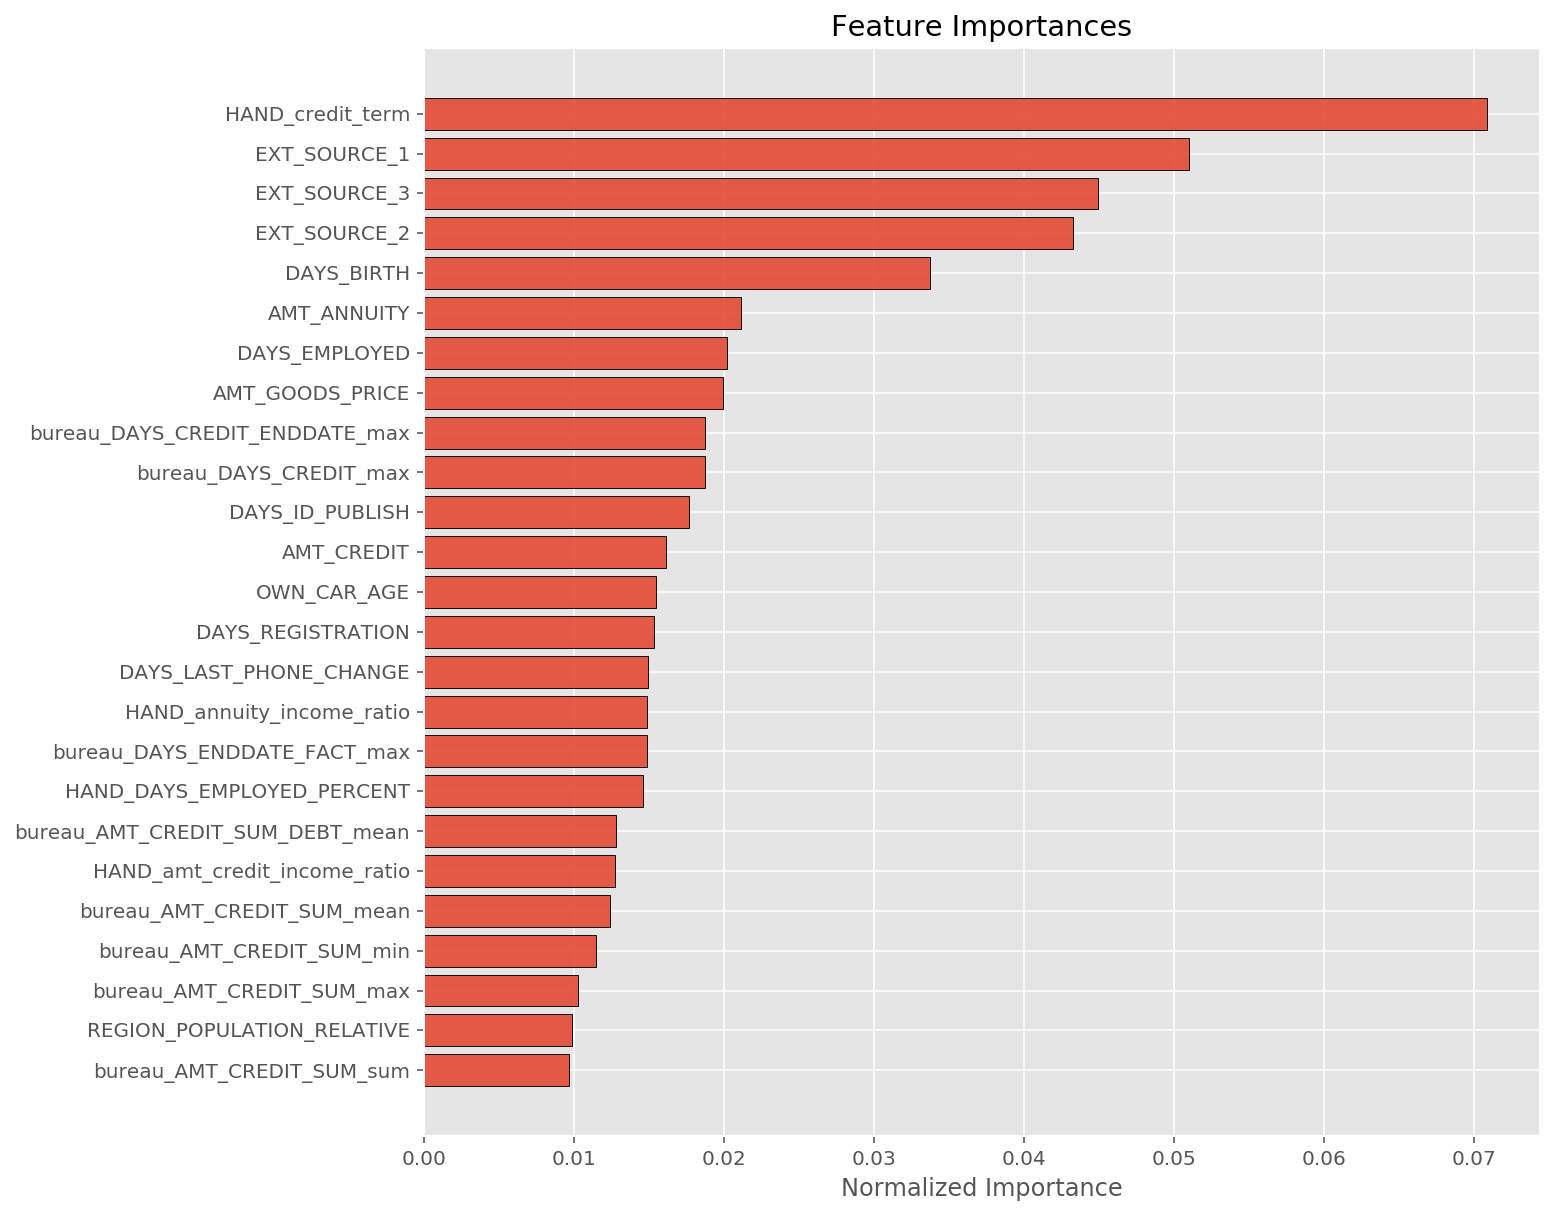

In [24]:
feat_import_series = F.plot_feature_importances(fi,n_show=25)

In [ ]:
submission1.to_csv('submissions/app_bureau.csv', index=False)

Kaggle score:`0.77137`

# Current Application - Bureau - Bureau Balance (level2)

**bureau_balance:** Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample # of relative previous credits # of months where we have some history observable for the previous credits) rows.

Parent: bureau | Child: bureau_balance Relationship: 1 to many (level1)

Parent: application | Child: bureau + Child: bureau_balance Relationship: 1 to many (level2)


In [25]:
bureau_balance = pd.read_csv('data/bureau_balance.csv.zip')

In [26]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [27]:
bureau_balance.select_dtypes('object').apply(pd.Series.nunique)

STATUS    8
dtype: int64

In [ ]:
bureau_agg, bureau_count = F.parent_child_df(parent_df=bureau,
    child_dfs=[bureau_balance],parent_id_name='SK_ID_CURR',child_id_name='SK_ID_BUREAU',
    group_names=['bu_balance','bureau'])

In [ ]:
df_train4 = df_train.merge(bureau_count2, on = 'SK_ID_CURR', how = 'left')
df_test4 = df_test.merge(bureau_count2, on = 'SK_ID_CURR', how = 'left')
df_train4 = df_train4.merge(bureau_agg2, on = 'SK_ID_CURR', how = 'left')
df_test4 = df_test4.merge(bureau_agg2, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print(df_train4.shape)
print(df_test4.shape)

In [ ]:
submission4, fi4, metrics4 = F.model(df_train4, df_test4)
print(metrics4)

In [ ]:
submission4.to_csv('submissions/app_bureau_bureau_balance.csv', index=False)

Kaggle Score:`0.77191`

In [ ]:
_ = F.plot_feature_importances(fi4, n_show=20)

# Current Application - Previous application (level1)

In [ ]:
previous = pd.read_csv('data/previous_application.csv.zip')

In [ ]:
previous.select_dtypes('object').apply(pd.Series.nunique)

In [ ]:
# Calculate aggregate statistics for each numeric column
previous_agg = F.agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)

In [ ]:
# Merge with the training and testing data
df_train2 = df_train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
df_test2 = df_test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print(df_train2.shape)
print(df_test2.shape)

In [ ]:
# Calculate value counts for each categorical column
previous_counts = F.count_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)

In [ ]:
previous_counts.head(2)

In [ ]:
df_train2 = df_train2.merge(previous_counts, on = 'SK_ID_CURR', how = 'left')
df_test2 = df_test2.merge(previous_counts, on = 'SK_ID_CURR', how = 'left')
print(df_train2.shape)
print(df_test2.shape)

In [ ]:
submission2, fi2, metrics2 = F.model(df_train2, df_test2)
print(metrics2)

In [ ]:
submission2.to_csv('submissions/app_previous.csv', index=False)

In [ ]:
submission2.head()

Kaggle score: `0.77137`

In [ ]:
_= F.plot_feature_importances(fi2, n_show=30)

In [ ]:
col_name('CNT_PAYMENT')

#  Current Application - Previous Application - Bureau (level 1)

In [ ]:
df_train2.head(2)

In [ ]:
df_train3 = df_train2.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
df_test3 = df_test2.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
df_train3 = df_train3.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
df_test3 = df_test3.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print(df_train3.shape)
print(df_test3.shape)

In [ ]:
submission3, fi3, metrics3 = F.model(df_train3, df_test3)
print(metrics3)

In [ ]:
submission3.to_csv('submissions/app_previous_bureau.csv', index=False)

Kaggle score: `0.77849`

In [ ]:
_ = F.plot_feature_importances(fi3, n_show=35)

# 5 Current Application - Previous Application - POS Cash Balance (level2)

In [ ]:
pos_cash = pd.read_csv('data/POS_CASH_balance.csv.zip')

In [ ]:
pos_cash.select_dtypes('object').apply(pd.Series.nunique)

In [ ]:
pos_cash.head()

In [ ]:
previous_agg2, previous_count2 = F.parent_child_df(
    previous,pos_cash,['SK_ID_PREV','SK_ID_CURR'],['pos_cash','previous'])

In [ ]:
previous_agg2.head()

In [ ]:
df_train5 = df_train.merge(previous_agg2, on = 'SK_ID_CURR', how = 'left')
df_test5 = df_test.merge(previous_agg2, on = 'SK_ID_CURR', how = 'left')
df_train5 = df_train5.merge(previous_count2, on = 'SK_ID_CURR', how = 'left')
df_test5 = df_test5.merge(previous_count2, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print(df_train5.shape)
print(df_test5.shape)

In [ ]:
submission5, fi5, metrics5 = F.model(df_train5, df_test5)
print(metrics5)

In [ ]:
_ = F.plot_feature_importances(fi5, n_show=30)

# 6 Current Application - Previous Application - POS Cash Balance - Installment - Credit Card balence

In [ ]:
instalments = pd.read_csv('data/installments_payments.csv.zip')

In [ ]:
instalments.select_dtypes('object').apply(pd.Series.nunique)

In [ ]:
credit_card = pd.read_csv('data/credit_card_balance.csv.zip')

In [ ]:
credit_card.select_dtypes('object').apply(pd.Series.nunique)

In [ ]:
credit_card.head()

In [ ]:
pos_cash.head()

In [ ]:
previous_agg3, previous_count3 = F.parent_child_df(parent_df=previous,
    child_dfs=[pos_cash,instalments,credit_card],parent_id_name='SK_ID_CURR',child_id_name='SK_ID_PREV',
    group_names=['pos_cash','instalments','credit_card','previous'])

In [ ]:
previous_agg3.head()

In [ ]:
df_train6 = df_train.merge(previous_agg3, on = 'SK_ID_CURR', how = 'left')
df_test6 = df_test.merge(previous_agg3, on = 'SK_ID_CURR', how = 'left')
df_train6 = df_train6.merge(previous_count3, on = 'SK_ID_CURR', how = 'left')
df_test6 = df_test6.merge(previous_count3, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print(df_train6.shape)

In [ ]:
submission6, fi6, metrics6 = F.model(df_train6, df_test6)
print(metrics6)

In [ ]:
submission6.to_csv('submissions/previous_level2.csv',index=False)

Kaggle score: `0.77900`

In [ ]:
_ = F.plot_feature_importances(fi6, n_show=30)

# 7 All tables combined

In [ ]:
df_train7 = df_train.merge(previous_agg3, on = 'SK_ID_CURR', how = 'left')
df_test7 = df_test.merge(previous_agg3, on = 'SK_ID_CURR', how = 'left')
df_train7 = df_train7.merge(previous_count3, on = 'SK_ID_CURR', how = 'left')
df_test7 = df_test7.merge(previous_count3, on = 'SK_ID_CURR', how = 'left')

df_train7 = df_train7.merge(bureau_count2, on = 'SK_ID_CURR', how = 'left')
df_test7 = df_test7.merge(bureau_count2, on = 'SK_ID_CURR', how = 'left')
df_train7 = df_train7.merge(bureau_agg2, on = 'SK_ID_CURR', how = 'left')
df_test7 = df_test7.merge(bureau_agg2, on = 'SK_ID_CURR', how = 'left')

In [ ]:
submission7, fi7, metrics7 = F.model(df_train7, df_test7)
print(metrics7)

In [ ]:
submission7.to_csv('submissions/total_level2.csv',index=False)

In [ ]:
_ = F.plot_feature_importances(fi7, n_show=30)

Kaggle score: `0.78734`

In [ ]:
submission8, fi8, metrics8 = F.model(df_train7, df_test7)
print(metrics8)